<a href="https://colab.research.google.com/github/jess-izuu/gis/blob/master/gis_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4326 != +init=epsg:4326 +type=crs)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


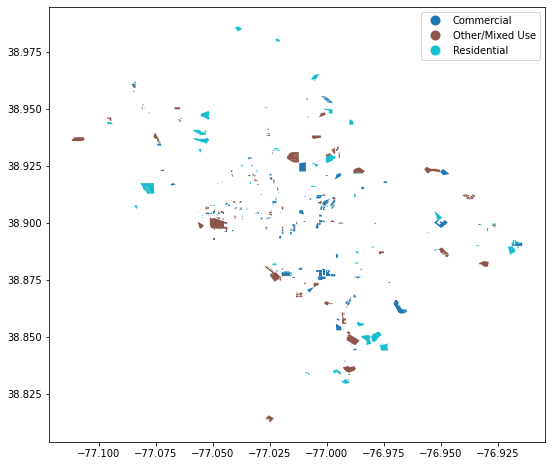

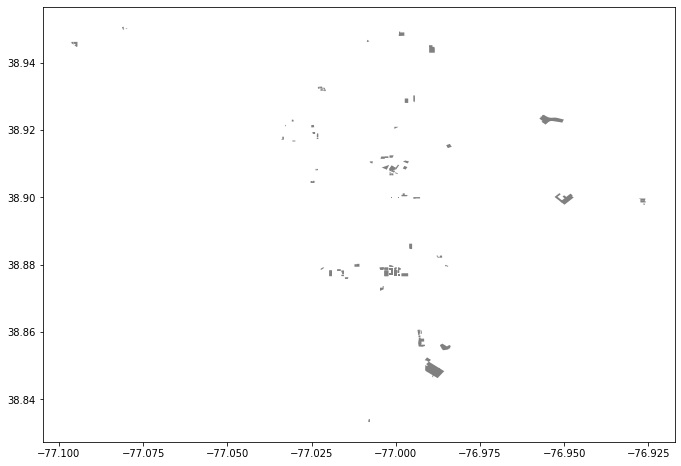

In [12]:
#!pip install geopandas
#!apt-get install -y libspatialindex-dev
#!pip install rtree

#import packages
#import pandas as pd  # provides interface for interacting with tabular data
#import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
#from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
#from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
#import rtree  # supports geospatial join

from google.colab import drive
#drive.mount('/content/gdrive') # connects Colab to your Google Drive
root_path = '/content/gdrive/My Drive/gis/' # set root path to folder where you uploaded the data

# Read in PUDs file as a geodataframe and initialize coordinate reference system (CRS)
puds = gpd.read_file(root_path+'input/Planned_Unit_Development_PUDs.shp', crs = {'init' :'epsg:4326'})
aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

# Create a geometry column in the affordable housing dataframe
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

# Use geospatial join to identify which PUDs include affordable housing projects
puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

# Merge dataframe with zoning categories crosswalk
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

# Create a map of PUDs by Zoning Category
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

# Create a map of just the PUDs that provide Affordable Housing
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,8));

# Export geodataframe as shapefile within Colab environment
#puds_info.to_file('puds_info.shp')


# Copy shapefile components from Colab environment to Google Drive using bash script
#!cp puds_info.cpg 'gdrive/My Drive/gis/output'
#!cp puds_info.dbf 'gdrive/My Drive/gis/output'
#!cp puds_info.prj 'gdrive/My Drive/gis/output'
#!cp puds_info.shp 'gdrive/My Drive/gis/output'
#!cp puds_info.shx 'gdrive/My Drive/gis/output'

